In [1]:
import numpy as np
import pandas as pd
from purifytext import clean_text
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv(r"archive\dataset.csv", encoding="utf-8")

In [3]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
df["language"].nunique()

22

In [5]:
df["language"].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [6]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [7]:
df.shape

(22000, 2)

In [8]:
df["language"].value_counts().reset_index()

,index,language
0,Estonian,1000
1,Swedish,1000
2,English,1000
3,Russian,1000
4,Romanian,1000
5,Persian,1000
6,Pushto,1000
7,Spanish,1000
8,Hindi,1000
9,Korean,1000


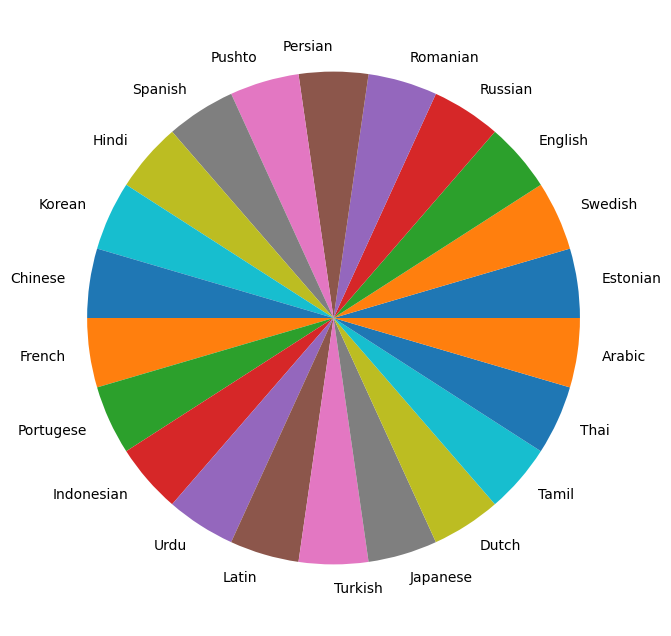

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(
    x=df["language"].value_counts().values, labels=df["language"].value_counts().index
)
plt.show()

In [10]:
def generate_word_cloud(lang):
    filtered_df = df['Text'][df['language']==lang]
    text_data = " ".join(filtered_df)
    wordcloud = WordCloud(
        background_color="white", colormap="coolwarm", max_words=10
    ).generate(text_data)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Estonian


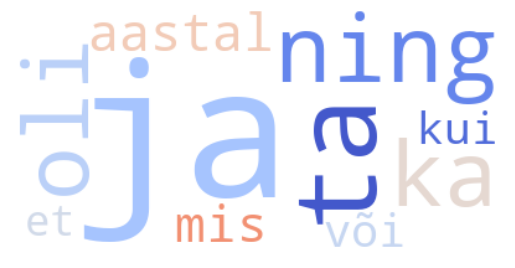

Swedish


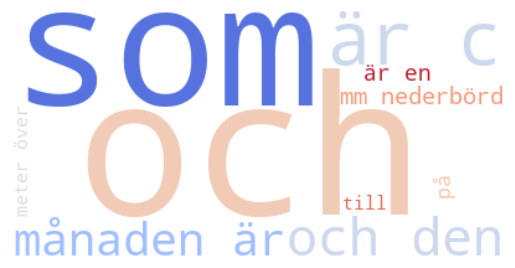

Thai


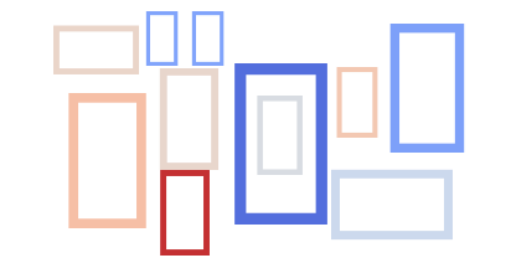

Tamil


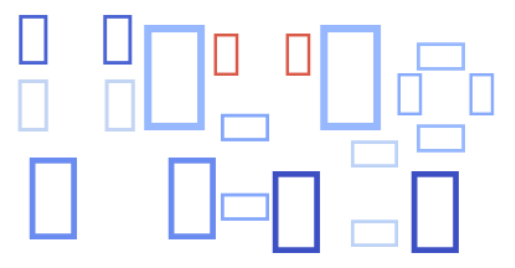

Dutch


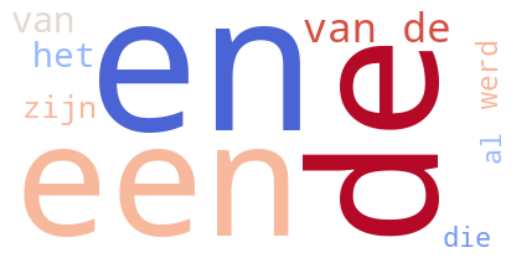

Japanese


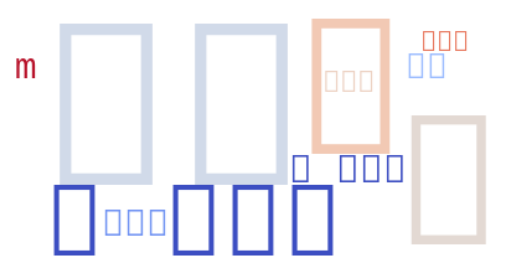

Turkish


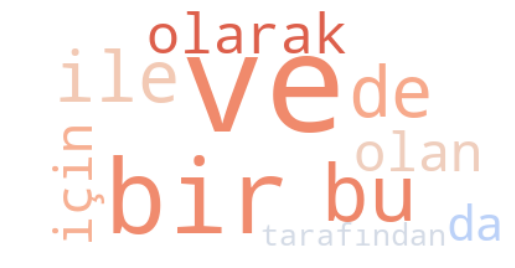

Latin


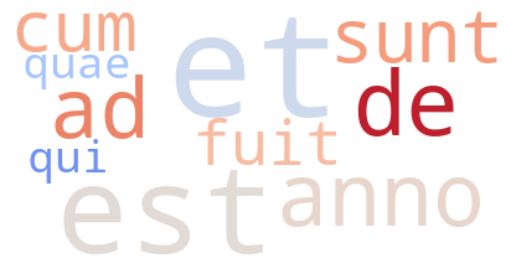

Urdu


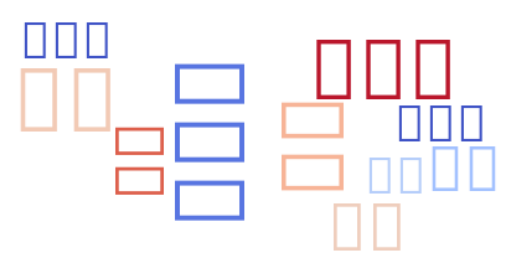

Indonesian


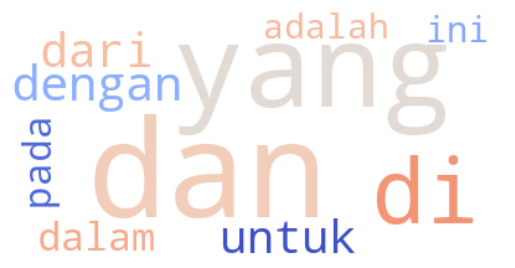

Portugese


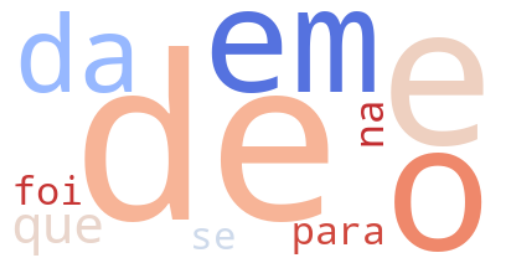

French


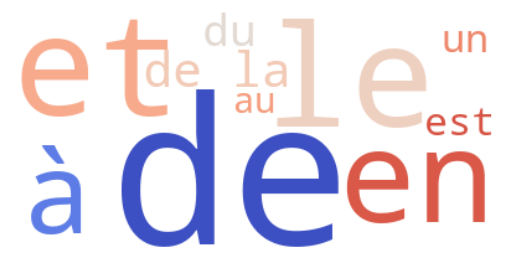

Chinese


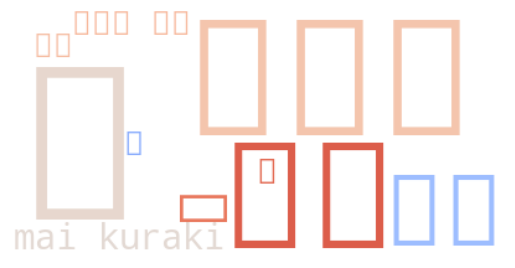

Korean


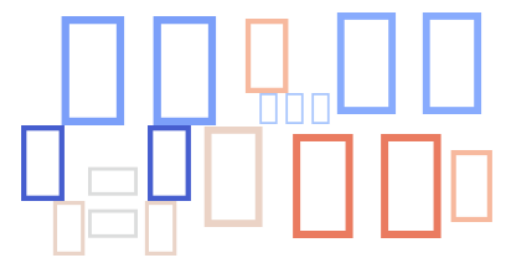

Hindi


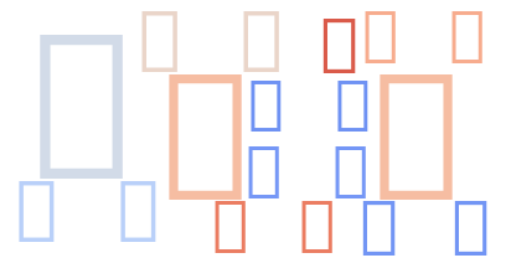

Spanish


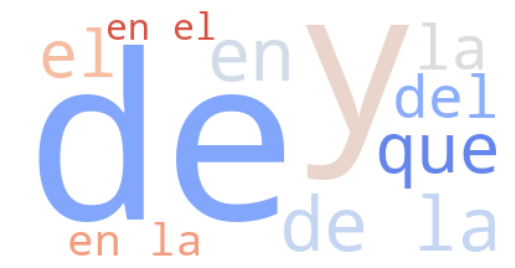

Pushto


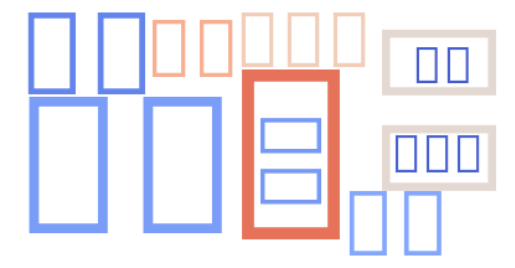

Persian


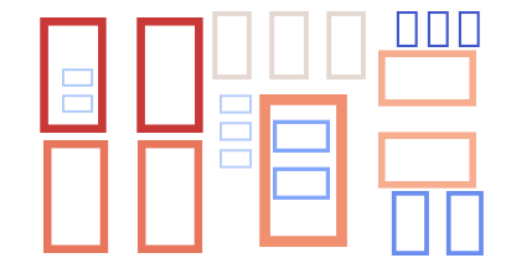

Romanian


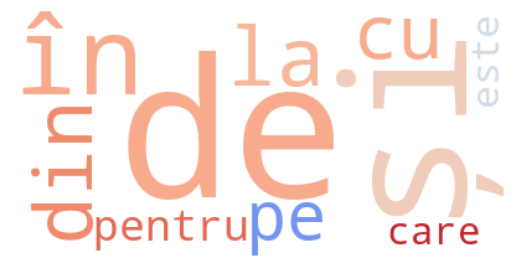

Russian


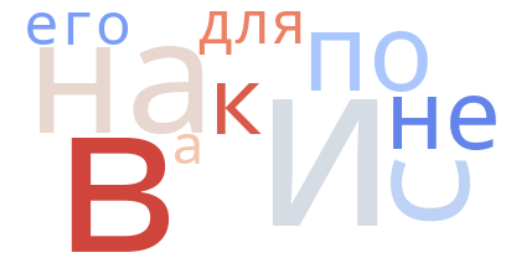

English


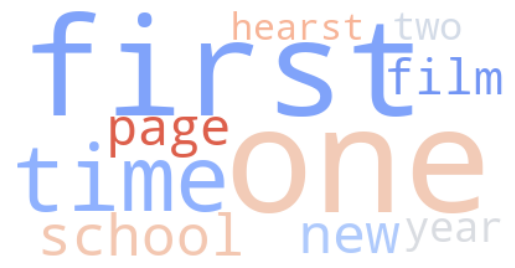

Arabic


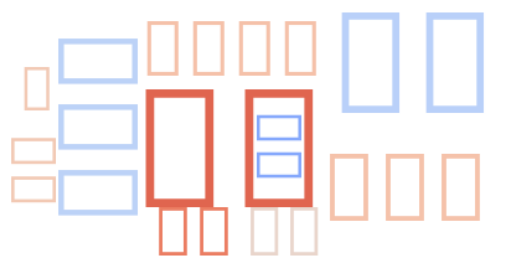

In [11]:
for lang in df['language'].unique():
    print(lang)
    generate_word_cloud(lang)

<font color='red'>Word clouds may not display correctly for all languages due to limitations with UTF-8 encoding, which does not fully support certain character sets. As a result, some languages may not appear properly in word clouds.</font>

### Conclusion:
In languages like English, Roman, and several others, the same letters are often used for word formation. Therefore, I will use n-grams, as they consider not only individual letters but also sequences of words for sentence formation.

`CountVectorizer` with `analyzer='char'` and `ngram_range=(1, 3)` is particularly useful for tasks where character-level patterns are significant, such as language detection, spelling correction, and some aspects of sentiment analysis or named entity recognition. It provides a flexible way to extract features from text data for machine learning models.

In [12]:
languages_with_english_characters = [
    'Estonian', 'Swedish', 'Dutch', 'Turkish', 'Latin',
    'Indonesian', 'Portugese', 'French', 'Russian', 'Romanian', 'English', 'Spanish'
]

languages_without_english_characters = [
    'Thai', 'Tamil', 'Japanese', 'Urdu','Chinese', 'Korean', 'Hindi',
    'Pushto', 'Persian', 'Arabic',
]
print(len(languages_with_english_characters))
print(len(languages_without_english_characters))

12
10


In [13]:
df_with_english_characters = df[df['language'].isin(languages_with_english_characters)]
df_without_english_characters = df[df['language'].isin(languages_without_english_characters)]

print("DataFrame with English Characters:")
display(df_with_english_characters.head())

print("\nDataFrame without English Characters:")
display(df_without_english_characters.head())

DataFrame with English Characters:


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
4,de spons behoort tot het geslacht haliclona en...,Dutch
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin



DataFrame without English Characters:


,Text,language
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [14]:
print(df_with_english_characters['language'].nunique(),df_without_english_characters['language'].nunique())
print(df_with_english_characters.shape,df_without_english_characters.shape)
print(df_with_english_characters.shape[0]+df_without_english_characters.shape[0])

12 10
(12000, 2) (10000, 2)
22000


In [15]:
cleaned_df_with_english_characters = clean_text(df_with_english_characters, 'Text',
                               remove_HTML=True,
                               lowercase=True,
                               remove_urls=True,
                               remove_emojis=True,
                               remove_punctuation=False,
                               remove_special_characters=False,
                               remove_numbers=True,
                               remove_whitespace=True,
                               expand_contractions=False,
                               remove_stopwords=False,
                               stemming=False,
                               lemmatizing=False)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

=== Cleaning Completed ===



In [16]:
cleaned_df_with_english_characters.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuits...,Swedish
4,de spons behoort tot het geslacht haliclona en...,Dutch
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin


In [17]:
def remove_english_letters(text, language):
    if language in languages_without_english_characters:
        return re.sub(r'[a-zA-Z]', '', text)
    else:
        return text 

In [18]:
df_without_english_characters['Text'] = df_without_english_characters.apply(lambda row: remove_english_letters(row['Text'], row['language']), axis=1)

In [19]:
df_without_english_characters.head()

,Text,language
2,ถนนเจริญกรุง อักษรโรมัน เริ่มตั้งแต่ถนนสนาม...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
8,برقی بار تمام زیرجوہری ذرات کی ا یک بنیادی م...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとマーティン高校に隣接...,Japanese


In [20]:
clean_df=pd.concat([cleaned_df_with_english_characters, df_without_english_characters], ignore_index=False)

In [21]:
clean_df=clean_df.sort_index()

In [22]:
clean_df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuits...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน เริ่มตั้งแต่ถนนสนาม...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [23]:
clean_df.shape

(22000, 2)

In [36]:
CORPUS = np.array(clean_df["Text"])
type(CORPUS)

numpy.ndarray

In [37]:
y = clean_df["language"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    CORPUS, y, test_size=0.2, random_state=42
)

In [35]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1, 3))),
    ('logistic', LogisticRegression())
])

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('logistic', LogisticRegression())])

In [40]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
    # Print classification report
print("Training Report")
print(f"Random Forest Classification Report:")
print(classification_report(y_train, y_train_pred))

    # Print confusion matrix
print(f"Random Forest Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test Report")
    # Print classification report
print(f"Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred))

    # Print confusion matrix
print(f"Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Report
Random Forest Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       798
     Chinese       1.00      0.99      1.00       799
       Dutch       1.00      1.00      1.00       770
     English       1.00      1.00      1.00       806
    Estonian       1.00      1.00      1.00       800
      French       1.00      1.00      1.00       812
       Hindi       1.00      0.99      0.99       792
  Indonesian       1.00      1.00      1.00       787
    Japanese       1.00      1.00      1.00       806
      Korean       1.00      1.00      1.00       810
       Latin       1.00      1.00      1.00       790
     Persian       1.00      1.00      1.00       804
   Portugese       1.00      1.00      1.00       806
      Pushto       0.96      1.00      0.98       804
    Romanian       1.00      1.00      1.00       803
     Russian       1.00      1.00      1.00       787
     Spanish       1.00     

### Summary
The logistic regression model has performed exceptionally well, achieving near-perfect precision, recall, and f1-scores on both the training and test datasets. The confusion matrices indicate very few misclassifications, and the overall accuracy is very high.

In [41]:
with open('language_classifier_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)